# Simple Anderson impurity model with two solvers

This notebook solves a simple Anderson impurity model using two different quantum impurity solvers.

In [1]:
%matplotlib inline
import numpy as np
from triqs.gf import *
from h5 import *
import triqs.utility.mpi as mpi
from triqs.plot.mpl_interface import *

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Starting run with 1 MPI rank(s) at : 2021-04-03 23:28:50.466242


## Parameters

In [2]:
# Parameters
beta = 20.0
n_iw = 200
U = 1.0
delta = 0.1
n_cycles = 10**9
max_time = 10

mu = 1.3 - U/2
eps0 = 0.2

## CT-INT solver

In [3]:
from triqs_ctint import Solver as SolverINT

Sint = SolverINT(beta, n_iw)

Sint.G0_iw << inverse(iOmega_n + mu - SemiCircular(2.0))

Sint.solve(U, delta, n_cycles, max_time = 10)
hist = Sint.histogram
print("Average order = ", np.sum(np.arange(len(hist)) * hist))

Average order =  1.0673363922408856


## CT-HYB solver

In [4]:
from triqs_cthyb import Solver as SolverHYB
from triqs.operators import *

gf_struct = [('up', [0]), ('down', [0])]
Shyb = SolverHYB(beta, gf_struct, n_iw=n_iw)

Shyb.G0_iw << inverse(iOmega_n + mu - SemiCircular(2.0))

Shyb.solve(h_int = U * n('up',0) * n('down',0),
           n_cycles = n_cycles,
           max_time = max_time)

## Show comparison

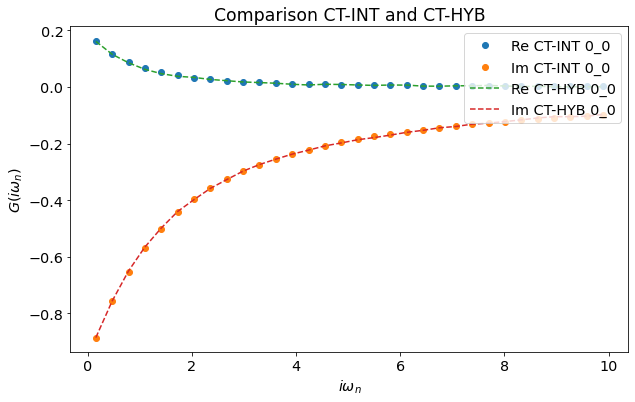

In [5]:
oplot(Sint.G_iw['up'], 'o', x_window=(0,10), name="CT-INT")
oplot(Shyb.G_iw['up'], '--', x_window=(0,10), name="CT-HYB")
plt.title("Comparison CT-INT and CT-HYB")
plt.xlabel(r"$i\omega_n$")
plt.ylabel(r"$G(i\omega_n)$");